In [1]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
us_data = pd.read_csv(r'D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\PoliceKillingsUS.csv', encoding='cp1252')

In [3]:
us_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
us_data.shape

(2535, 14)

Features at the Dataset:

The file fatal-police-shootings-data.csv contains data about each fatal shooting in CSV format. The file can be downloaded at this URL. Each row has the following variables:

id: a unique identifier for each victim

name: the name of the victim

date: the date of the fatal shooting in YYYY-MM-DD format

manner_of_death: shot, shot and Tasered

armed: indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm

undetermined: it is not known whether or not the victim had a weapon

unknown: the victim was armed, but it is not known what the object was

unarmed: the victim was not armed

age: the age of the victim

gender: the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.

M: Male

F: Female

None: unknown

race:

W: White, non-Hispanic

B: Black, non-Hispanic

A: Asian

N: Native American

H: Hispanic

O: Other

None: unknown

city: the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.

state: two-letter postal code abbreviation
signs of mental illness: News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.

threat_level: The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

flee: News reports have indicated the victim was moving away from officers:
Foot,
Car,
Not fleeing

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.

body_camera: News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

In [5]:
print(np.__version__)

1.17.3


In [6]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [7]:
#drop id and name columns
us_data.drop(['id', 'name'], axis=1, inplace=True)

In [8]:
us_data['date'] =  pd.to_datetime(us_data['date'])

In [9]:
us_data.head(5)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
us_data['manner_of_death'].value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

In [11]:
us_data['armed'].value_counts().to_dict()

{'gun': 1398,
 'knife': 373,
 'vehicle': 177,
 'unarmed': 171,
 'undetermined': 117,
 'toy weapon': 104,
 'machete': 18,
 'unknown weapon': 18,
 'ax': 9,
 'Taser': 9,
 'baseball bat': 8,
 'sword': 8,
 'hammer': 7,
 'box cutter': 7,
 'metal pipe': 7,
 'hatchet': 6,
 'crossbow': 6,
 'gun and knife': 5,
 'blunt object': 5,
 'screwdriver': 5,
 'guns and explosives': 3,
 'rock': 3,
 'metal stick': 3,
 'scissors': 3,
 'beer bottle': 2,
 'hatchet and gun': 2,
 'piece of wood': 2,
 'chain saw': 2,
 'pipe': 2,
 'brick': 2,
 'shovel': 2,
 'metal object': 2,
 'metal pole': 2,
 'baton': 2,
 'meat cleaver': 2,
 'sharp object': 2,
 'metal rake': 1,
 'motorcycle': 1,
 'glass shard': 1,
 'baseball bat and bottle': 1,
 'crowbar': 1,
 'oar': 1,
 'fireworks': 1,
 'machete and gun': 1,
 'bayonet': 1,
 'pitchfork': 1,
 'tire iron': 1,
 'pole and knife': 1,
 'air conditioner': 1,
 'bean-bag gun': 1,
 'spear': 1,
 'flashlight': 1,
 'nail gun': 1,
 'lawn mower blade': 1,
 'flagpole': 1,
 'cordless drill': 1,


In [12]:
us_data['gender'].value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [13]:
us_data['race'] = us_data['race'].replace({'W':'White', 'B':'Black', 'H':'Hispanic', 'A':'Asian', 'N':'Native American', 'O':'Others'})
us_data['race'].value_counts()

White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Others               28
Name: race, dtype: int64

In [14]:
us_data['city'].nunique()

1417

In [15]:
us_data['state'].nunique()

51

In [16]:
us_data['signs_of_mental_illness'].value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [17]:
us_data['signs_of_mental_illness'] = us_data['signs_of_mental_illness'].replace({False:0, True:1})

In [18]:
us_data['threat_level'].value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

In [19]:
us_data['flee'].value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

In [20]:
us_data['body_camera'].value_counts()

False    2264
True      271
Name: body_camera, dtype: int64

In [21]:
us_data['body_camera'] = us_data['body_camera'].replace({False:0, True:1})

In [22]:
us_data.head().T

,0,1,2,3,4
date,2015-02-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-04-01 00:00:00
manner_of_death,shot,shot,shot and Tasered,shot,shot
armed,gun,gun,unarmed,toy weapon,nail gun
age,53.0,47.0,23.0,32.0,39.0
gender,M,M,M,M,M
race,Asian,White,Hispanic,White,Hispanic
city,Shelton,Aloha,Wichita,San Francisco,Evans
state,WA,OR,KS,CA,CO
signs_of_mental_illness,1,0,0,1,0
threat_level,attack,attack,other,attack,attack


In [23]:
us_data.tail()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2017-07-28,shot,gun,31.0,M,NaN,Kansas City,MO,0,attack,Not fleeing,0
2531,2017-07-28,shot,vehicle,NaN,M,NaN,Albuquerque,NM,0,attack,Car,0
2532,2017-07-29,shot,gun,48.0,M,NaN,Melba,ID,0,attack,Car,0
2533,2017-07-31,shot,vehicle,28.0,M,Black,Oshkosh,WI,0,attack,Car,1
2534,2017-07-31,shot,knife,32.0,M,Black,Brooklyn,NY,1,attack,Not fleeing,0


In [24]:
us_data.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,2535,879,2017-01-24 00:00:00,8,2015-01-03,2017-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manner_of_death,2535,2,shot,2363,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
armed,2526,68,gun,1398,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2458.0,NaN,NaN,NaN,NaT,NaT,36.60537,13.030774,6.0,26.0,34.0,45.0,91.0
gender,2535,2,M,2428,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,2340,6,White,1201,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,2535,1417,Los Angeles,39,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,2535,51,CA,424,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signs_of_mental_illness,2535.0,NaN,NaN,NaN,NaT,NaT,0.249704,0.432927,0.0,0.0,0.0,0.0,1.0
threat_level,2535,3,attack,1611,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


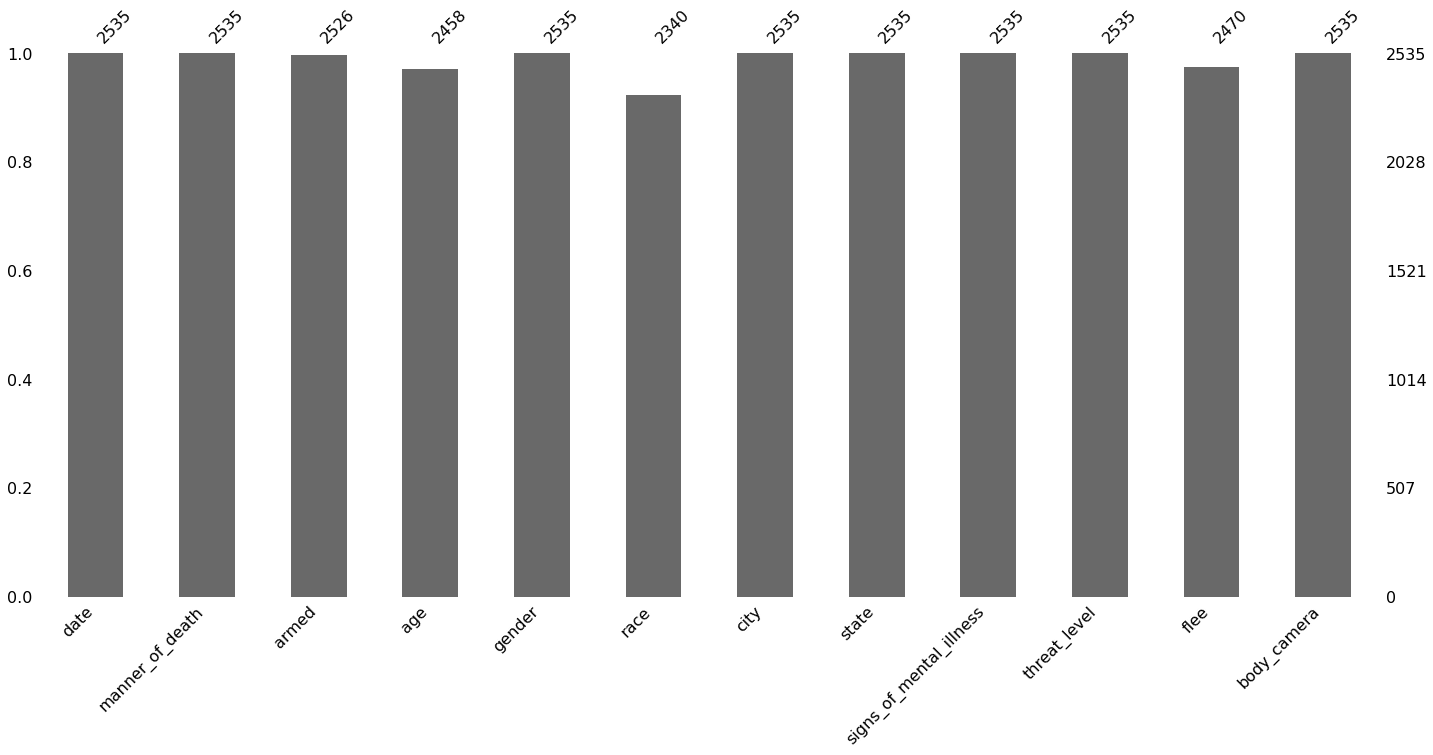

In [25]:
import missingno as msno
msno.bar(us_data)
plt.show()

In [26]:
cat_cols = []
for cols in us_data.select_dtypes("object"):
    cat_cols.append(cols)
    
num_cols = []
for cols in us_data.select_dtypes(["int64", "float64"]):
    num_cols.append(cols)

In [27]:
for col in cat_cols:
    us_data[col] = us_data[col].astype('category')

In [28]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     2535 non-null   datetime64[ns]
 1   manner_of_death          2535 non-null   category      
 2   armed                    2526 non-null   category      
 3   age                      2458 non-null   float64       
 4   gender                   2535 non-null   category      
 5   race                     2340 non-null   category      
 6   city                     2535 non-null   category      
 7   state                    2535 non-null   category      
 8   signs_of_mental_illness  2535 non-null   int64         
 9   threat_level             2535 non-null   category      
 10  flee                     2470 non-null   category      
 11  body_camera              2535 non-null   int64         
dtypes: category(8), datetime64[ns](1),

In [29]:
cat_cols

['manner_of_death',
 'armed',
 'gender',
 'race',
 'city',
 'state',
 'threat_level',
 'flee']

In [30]:
num_cols

['age', 'signs_of_mental_illness', 'body_camera']

In [31]:
us_data.columns

Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera'],
      dtype='object')

In [32]:
us_data.isnull().sum()

date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [33]:
#imputing missing values in categorical columns
from sklearn.impute import SimpleImputer
us_data_df = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(us_data[cat_cols]))
us_data_df.columns = cat_cols

In [34]:
us_data[cat_cols] = us_data_df

In [35]:
us_data['age'].fillna(us_data['age'].mean(), inplace=True)

In [36]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     2535 non-null   datetime64[ns]
 1   manner_of_death          2535 non-null   object        
 2   armed                    2535 non-null   object        
 3   age                      2535 non-null   float64       
 4   gender                   2535 non-null   object        
 5   race                     2535 non-null   object        
 6   city                     2535 non-null   object        
 7   state                    2535 non-null   object        
 8   signs_of_mental_illness  2535 non-null   int64         
 9   threat_level             2535 non-null   object        
 10  flee                     2535 non-null   object        
 11  body_camera              2535 non-null   int64         
dtypes: datetime64[ns](1), float64(1), 

In [37]:
#top 10 cities with most number of fatal killings
fatal = us_data.assign(death_by_shot = np.where(us_data['manner_of_death']=='shot', 1, 0),
                       death_by_shot_and_tashered = np.where(us_data['manner_of_death']=='shot and Tasered', 1, 0),
                        ).groupby('city', as_index=False).agg({'death_by_shot':sum,'death_by_shot_and_tashered':sum})

In [38]:
fatal.nlargest(10, ['death_by_shot_and_tashered'])

,city,death_by_shot,death_by_shot_and_tashered
732,Los Angeles,33,6
1291,Tulsa,8,4
416,Fayetteville,1,3
578,Houston,24,3
60,Austin,16,2
241,Chicago,23,2
490,Glendale,6,2
687,Las Vegas,19,2
729,Long Beach,9,2
808,Miami,16,2


In [39]:
fatal.nlargest(10, ['death_by_shot'])

,city,death_by_shot,death_by_shot_and_tashered
732,Los Angeles,33,6
995,Phoenix,30,1
578,Houston,24,3
241,Chicago,23,2
284,Columbus,19,0
687,Las Vegas,19,2
1118,San Antonio,19,1
60,Austin,16,2
808,Miami,16,2
1217,St. Louis,15,0


In [40]:
us_data['age'] = pd.cut(us_data.age.to_list(), bins=[6.0,13.0,20.0,28.0,37.0,56.0,66.0,91.0], labels=['children(<12)','teenage','young(20-27)','adult(28-36)','midage(37-55)','aged(56-65)','old(66-91)'], include_lowest=True)


In [41]:
#police killing happened in different age groups with threat level anfd the manner of death
age_killed = us_data.assign(children_killed = np.where(us_data['age']=='children(<12)', 1, 0),
                            teenage_killed = np.where(us_data['age']=='teenage', 1, 0),
                            youth_killed = np.where(us_data['age']=='young(20-27)', 1, 0),
                            adult_killed = np.where(us_data['age']=='adult(28-36)', 1, 0),
                            midaged_killed = np.where(us_data['age']=='midage(37-55)', 1, 0),
                            aged_killed = np.where(us_data['age']=='aged(56-65)', 1, 0),
                            old_killed = np.where(us_data['age']=='old(66-91)', 1, 0)).groupby(['threat_level','manner_of_death'], as_index=False).agg({'children_killed':sum,'teenage_killed':sum, 'youth_killed':sum, 'adult_killed':sum, 'midaged_killed':sum, 'aged_killed':sum, 'old_killed':sum})

In [42]:
age_killed

,threat_level,manner_of_death,children_killed,teenage_killed,youth_killed,adult_killed,midaged_killed,aged_killed,old_killed
0,attack,shot,0,105,346,454,484,108,37
1,attack,shot and Tasered,0,7,15,25,27,2,1
2,other,shot,3,46,170,220,197,33,10
3,other,shot and Tasered,0,6,14,28,32,5,2
4,undetermined,shot,0,20,37,45,39,7,2
5,undetermined,shot and Tasered,0,0,1,5,2,0,0


In [43]:
#mapping state name to respective cities
p = us_data.groupby('city', as_index=False)['state']
p = p.first()
fatal['state'] = p['state']

In [44]:
fatal_statewise = fatal.groupby('state', as_index=False).sum()
fatal_statewise

,state,death_by_shot,death_by_shot_and_tashered
0,AK,13,1
1,AL,47,4
2,AR,21,3
3,AZ,113,6
4,CA,389,40
5,CO,68,3
6,CT,7,1
7,DC,11,0
8,DE,2,0
9,FL,146,12


In [45]:
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg

In [46]:
po.init_notebook_mode(connected = True)

In [47]:
data1 = dict(type='choropleth', locations=fatal_statewise['state'], locationmode='USA-states', z=fatal_statewise['death_by_shot'], text=fatal_statewise['state'])
layout1 = dict(title = "State-wise Police Killing By Shot", geo={'scope':'usa'})

fig1 = pg.Figure(data=data1, layout=layout1)
fig1.show()

trace0 = pg.Scatter(x = fatal['city'],
                    y = fatal['death_by_shot'])
data = [trace0]
layout = dict(title = "City-wise Police Killing By Shot", geo={'scope':'usa'})

fig = pg.Figure(data=data, layout=layout)
fig.show()


In [48]:
data = dict(type='choropleth', locations=fatal_statewise['state'], locationmode='USA-states', z=fatal_statewise['death_by_shot_and_tashered'], text=fatal_statewise['state'])
layout = dict(title = "State-wise Police Killing By Shot and Tashered", geo={'scope':'usa'}, scattermode="group")
x = pg.Figure(data=[data], layout=layout)
x.show()

trace1 = pg.Scatter(x = fatal['city'],
                    y = fatal['death_by_shot_and_tashered'])
data = [trace1]
layout = dict(title = "City-wise Police Killing By Shot and Tashered", geo={'scope':'usa'}, scattermode="group")

fig2 = pg.Figure(data=data, layout=layout)
fig2.show()


In [49]:
us_data['year'] = us_data['date'].dt.year
us_data['month'] = us_data['date'].dt.month_name()
us_data['day_of week'] = us_data['date'].dt.day_name()
us_data.drop('date', axis =1, inplace=True)
us_data

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day_of week
0,shot,gun,midage(37-55),M,Asian,Shelton,WA,1,attack,Not fleeing,0,2015,February,Sunday
1,shot,gun,midage(37-55),M,White,Aloha,OR,0,attack,Not fleeing,0,2015,February,Sunday
2,shot and Tasered,unarmed,young(20-27),M,Hispanic,Wichita,KS,0,other,Not fleeing,0,2015,March,Sunday
3,shot,toy weapon,adult(28-36),M,White,San Francisco,CA,1,attack,Not fleeing,0,2015,April,Wednesday
4,shot,nail gun,midage(37-55),M,Hispanic,Evans,CO,0,attack,Not fleeing,0,2015,April,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,shot,gun,adult(28-36),M,White,Kansas City,MO,0,attack,Not fleeing,0,2017,July,Friday
2531,shot,vehicle,adult(28-36),M,White,Albuquerque,NM,0,attack,Car,0,2017,July,Friday
2532,shot,gun,midage(37-55),M,White,Melba,ID,0,attack,Car,0,2017,July,Saturday
2533,shot,vehicle,young(20-27),M,Black,Oshkosh,WI,0,attack,Car,1,2017,July,Monday


In [50]:
cat_cols = []
for cols in us_data.select_dtypes("object", "category"):
    cat_cols.append(cols)
    
num_cols = []
for cols in us_data.select_dtypes(["int64", "float64"]):
    num_cols.append(cols)

In [51]:
cat_cols.append('year')
num_cols.remove('year')

In [52]:
for col in cat_cols:
    us_data[col] = us_data[col].astype('category')

In [53]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   manner_of_death          2535 non-null   category
 1   armed                    2535 non-null   category
 2   age                      2535 non-null   category
 3   gender                   2535 non-null   category
 4   race                     2535 non-null   category
 5   city                     2535 non-null   category
 6   state                    2535 non-null   category
 7   signs_of_mental_illness  2535 non-null   int64   
 8   threat_level             2535 non-null   category
 9   flee                     2535 non-null   category
 10  body_camera              2535 non-null   int64   
 11  year                     2535 non-null   category
 12  month                    2535 non-null   category
 13  day_of week              2535 non-null   category
dtypes: categ

In [54]:
us_data_copy = us_data.copy()

In [55]:
#scaling up features
from sklearn.preprocessing import LabelEncoder

#target column
tgt_col = ['manner_of_death']

#categorical columns
category_names = us_data.nunique()[us_data.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

#numerical columns
#num_cols = [i for i in cred_data.columns if i not in category_names]

#binary columns
bin_cols = us_data.nunique()[us_data.nunique()==2].keys().tolist()

#multi-columns
multi_cols = [i for i in category_names if i not in bin_cols]

#Label Encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    us_data[i] = le.fit_transform(us_data[i])

#duplicating cols for multi-value columns
us_data = pd.get_dummies(data=us_data, columns=multi_cols)

In [56]:
#label encoding
from sklearn.preprocessing import LabelBinarizer
columns = us_data.nunique()[us_data.nunique() > 15].keys().tolist()
#columns = columns.as_array()
encoder = LabelBinarizer()
for i in columns:
    us_data[i] = encoder.fit_transform(us_data[i])

In [57]:
#Model Building
cols = [i for i in us_data.columns if i not  in tgt_col]
X = us_data[cols]
Y = us_data[tgt_col]

In [58]:
X

,armed,gender,city,state,signs_of_mental_illness,body_camera,age_children(<12),age_teenage,age_young(20-27),age_adult(28-36),...,month_November,month_October,month_September,day_of week_Friday,day_of week_Monday,day_of week_Saturday,day_of week_Sunday,day_of week_Thursday,day_of week_Tuesday,day_of week_Wednesday
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2531,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2532,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2533,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
#using stratified K-Fold Cross Validation to split train and test data
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
i=1
for train_index, test_index in folds.split(X,Y):
    print("{} of KFold".format(i,folds.n_splits))
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]
    knn.fit(X_train,Y_train)
    y_test_pred = knn.predict(X_test)
    
    cm = confusion_matrix(Y_test,y_test_pred)
    print(cm)
    print("\n")
    print(classification_report(Y_test,y_test_pred))
    print("\n")
    i=i+1

1 of KFold
[[442  31]
 [ 33   1]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       473
           1       0.03      0.03      0.03        34

    accuracy                           0.87       507
   macro avg       0.48      0.48      0.48       507
weighted avg       0.87      0.87      0.87       507



2 of KFold
[[453  20]
 [ 31   3]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       473
           1       0.13      0.09      0.11        34

    accuracy                           0.90       507
   macro avg       0.53      0.52      0.53       507
weighted avg       0.88      0.90      0.89       507



3 of KFold
[[439  34]
 [ 33   1]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       473
           1       0.03      0.03      0.03        34

    accuracy                           0.87       507
   macro avg    

In [61]:
#choosing optimum K value
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.28,random_state=0)

knn = KNeighborsClassifier()

In [62]:
Y_test['manner_of_death'].value_counts()

0    663
1     47
Name: manner_of_death, dtype: int64

In [63]:
error_rate = []
j=1

for train_index,test_index in folds.split(X,Y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]
    for i in range(1,140):
        knn.fit(X_train,Y_train)
        y_test_pred = knn.predict(X_test)
        y_test_pred = y_test_pred.reshape(507,1)
        error_rate.append(np.mean(y_test_pred != Y_test))
        j=j+1

In [64]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_test_pred = knn.predict(X_test)
    y_test_pred = y_test_pred.reshape(507,1)
    error_rate.append(np.mean(y_test_pred != Y_test))

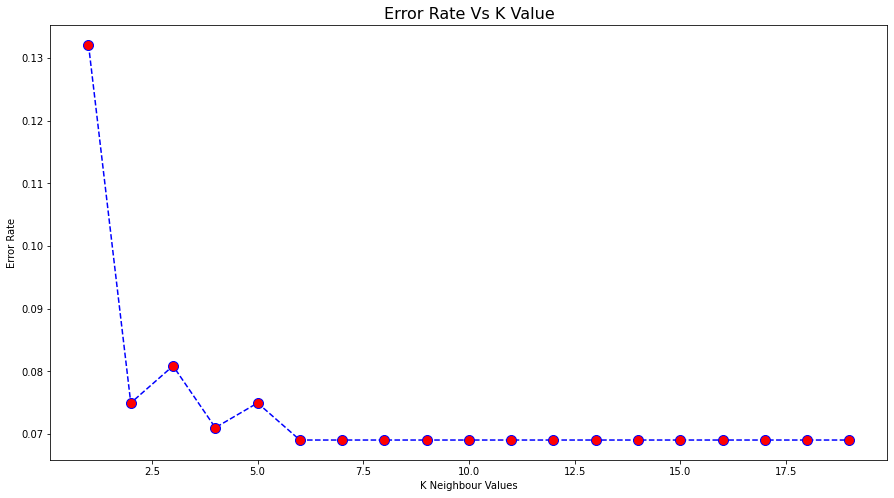

In [65]:
plt.figure(figsize=(15,8))
plt.plot(range(1,20),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate Vs K Value", fontsize=16)
plt.xlabel("K Neighbour Values")
plt.ylabel("Error Rate")
plt.show()

In [66]:
#comparison with K=1 and K=6
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print("K-value = 1\n")
print(confusion_matrix(Y_test,y_pred))
print("\n")
print(classification_report(Y_test,y_pred))

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print("\nK-value = 6\n")
print(confusion_matrix(Y_test,y_pred))
print("\n")
print(classification_report(Y_test,y_pred))

K-value = 1

[[435  37]
 [ 30   5]]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       472
           1       0.12      0.14      0.13        35

    accuracy                           0.87       507
   macro avg       0.53      0.53      0.53       507
weighted avg       0.88      0.87      0.87       507


K-value = 6

[[472   0]
 [ 35   0]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       472
           1       0.00      0.00      0.00        35

    accuracy                           0.93       507
   macro avg       0.47      0.50      0.48       507
weighted avg       0.87      0.93      0.90       507



In [67]:
from sklearn.neighbors import BallTree
balt = BallTree(X_train, leaf_size=30, metric='hamming')
distances, neighbors = balt.query(X_train, k=6)

print(neighbors[:3], neighbors.shape)#printing first 3
print("\n")
print(distances[:3], distances.shape)#printing first 3

[[  0   1 115  15 110  63]
 [  1 106  80  94  79  97]
 [  2 365  16 118  70 148]] (2028, 6)


[[0.         0.0625     0.08333333 0.08333333 0.08333333 0.08333333]
 [0.         0.04166667 0.04166667 0.04166667 0.04166667 0.04166667]
 [0.         0.0625     0.08333333 0.08333333 0.08333333 0.08333333]] (2028, 6)


Text(0, 0.5, 'Mean Distances')

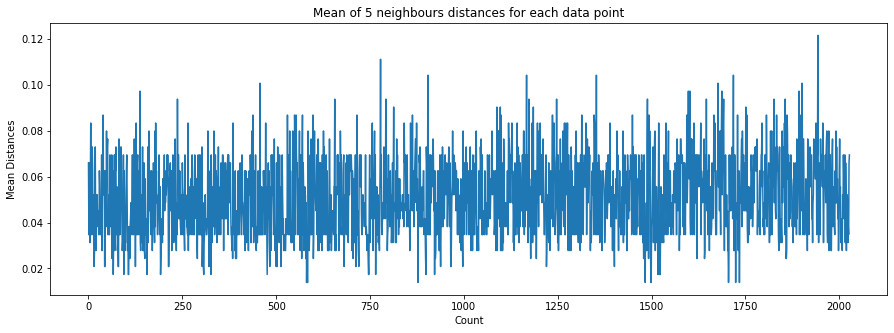

In [68]:
#plotting for each row in X-axis and mean distances in Y-axis
plt.figure(figsize=(15,5))
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title("Mean of 5 neighbours distances for each data point")
plt.xlabel('Count')
plt.ylabel('Mean Distances')

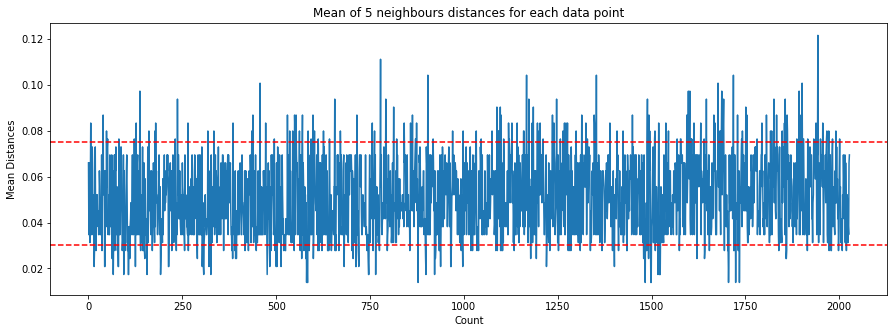

In [69]:
#plotting the cut-off region where mean distance is neither too high or too low
plt.figure(figsize=(15,5))
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title("Mean of 5 neighbours distances for each data point")
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y=0.03, color='r', linestyle='--')
plt.axhline(y=0.075, color='r', linestyle='--')

In [70]:
#getting outliers
outlier_below = np.where(dist_means<0.03)
outlier_above = np.where(dist_means>0.075)
print("Outliers below mean distance:\n", outlier_below)
print("Outliers above mean distance:\n", outlier_above)

Outliers below mean distance:
 (array([  15,   16,   20,   36,   43,   44,   63,   66,   70,   77,   79,
         80,   90,   94,   97,  104,  106,  107,  110,  125,  139,  145,
        147,  149,  150,  156,  170,  192,  193,  213,  214,  222,  234,
        256,  266,  290,  303,  306,  307,  321,  326,  360,  382,  384,
        390,  392,  394,  417,  426,  447,  476,  483,  486,  497,  500,
        502,  513,  520,  524,  525,  548,  564,  568,  574,  579,  581,
        582,  583,  584,  588,  599,  611,  614,  622,  637,  638,  640,
        647,  657,  659,  667,  681,  702,  705,  712,  713,  714,  720,
        742,  745,  746,  747,  758,  765,  775,  796,  856,  878,  898,
        899,  922,  924,  925,  934,  935,  938,  965,  966,  993,  997,
       1019, 1023, 1035, 1039, 1085, 1089, 1098, 1101, 1103, 1134, 1178,
       1193, 1220, 1229, 1252, 1278, 1282, 1285, 1310, 1337, 1368, 1396,
       1401, 1412, 1434, 1435, 1479, 1482, 1483, 1485, 1487, 1492, 1498,
       1499, 1510, 

In [71]:
outlier_below_mean = us_data_copy.iloc[outlier_below]
outlier_above_mean = us_data_copy.iloc[outlier_above]

In [72]:
outlier_below_mean

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day_of week
15,shot,vehicle,young(20-27),M,White,Huntley,MT,0,undetermined,Not fleeing,0,2015,August,Saturday
16,shot,shovel,midage(37-55),M,White,Salt Lake City,UT,0,attack,Not fleeing,1,2015,August,Saturday
20,shot,gun,adult(28-36),M,Hispanic,El Paso,TX,0,attack,Not fleeing,0,2015,September,Tuesday
36,shot,gun,adult(28-36),M,White,Evangeline Parish,LA,0,attack,Not fleeing,0,2015,January,Thursday
43,shot and Tasered,gun,old(66-91),M,White,Gunlock,KY,1,attack,Not fleeing,0,2015,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,shot,gun,young(20-27),M,Black,St. Louis,MO,0,attack,Car,0,2017,September,Friday
1979,shot,knife,adult(28-36),M,White,Los Angeles,CA,0,other,Not fleeing,0,2017,October,Sunday
1998,shot,gun,midage(37-55),M,Hispanic,Twentynine Palms,CA,0,attack,Not fleeing,0,2017,January,Tuesday
2008,shot,gun,midage(37-55),M,White,Gainesville,FL,1,attack,Not fleeing,0,2017,January,Friday


In [73]:
outlier_below_mean

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day_of week
15,shot,vehicle,young(20-27),M,White,Huntley,MT,0,undetermined,Not fleeing,0,2015,August,Saturday
16,shot,shovel,midage(37-55),M,White,Salt Lake City,UT,0,attack,Not fleeing,1,2015,August,Saturday
20,shot,gun,adult(28-36),M,Hispanic,El Paso,TX,0,attack,Not fleeing,0,2015,September,Tuesday
36,shot,gun,adult(28-36),M,White,Evangeline Parish,LA,0,attack,Not fleeing,0,2015,January,Thursday
43,shot and Tasered,gun,old(66-91),M,White,Gunlock,KY,1,attack,Not fleeing,0,2015,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,shot,gun,young(20-27),M,Black,St. Louis,MO,0,attack,Car,0,2017,September,Friday
1979,shot,knife,adult(28-36),M,White,Los Angeles,CA,0,other,Not fleeing,0,2017,October,Sunday
1998,shot,gun,midage(37-55),M,Hispanic,Twentynine Palms,CA,0,attack,Not fleeing,0,2017,January,Tuesday
2008,shot,gun,midage(37-55),M,White,Gainesville,FL,1,attack,Not fleeing,0,2017,January,Friday


In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
#Parameter tuning with GridSearchCV 
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (10,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   

grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [76]:
KNN_1=grid_search_KNN.fit(X_train, Y_train)
y_pred_KNN1 =KNN_1.predict(X_test)

In [77]:
#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [78]:
print('Best Score - KNN:', grid_search_KNN.best_score_ )

Best Score - KNN: 0.9324466338259443


In [79]:
#predicting with the best params
knn = KNeighborsClassifier(n_neighbors=10, leaf_size=10, metric='minkowski', p=1, weights='uniform')
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
#print("K-value = 1\n")
print(confusion_matrix(Y_test,y_pred))
print("\n")
print(classification_report(Y_test,y_pred))

[[472   0]
 [ 35   0]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       472
           1       0.00      0.00      0.00        35

    accuracy                           0.93       507
   macro avg       0.47      0.50      0.48       507
weighted avg       0.87      0.93      0.90       507

